In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
tf.__version__

'2.4.1'

In [21]:
class Model:
    def __init__(self):
        self.W = tf.Variable(2.)
        self.b = tf.Variable(1.)
        
    def __call__(self, X):
        return self.W * X + self.b

In [22]:
mod = Model()

In [23]:
def mse(pred, y):
    return tf.reduce_mean(tf.square(pred - y))

In [24]:
TRUE_W = 3
TRUE_B = 2
N = 1000

In [25]:
xs = tf.random.normal(shape=[N])
ys = (TRUE_W * xs) + TRUE_B

In [26]:
def plot_data(inputs, outputs, preds):
    real = plt.scatter(inputs, outputs, c='b', alpha=0.05)
    predicted = plt.scatter(inputs, preds, c='r', alpha=0.05)
    plt.legend((real, predicted), ('Actual', 'Predicted'))
    plt.show()

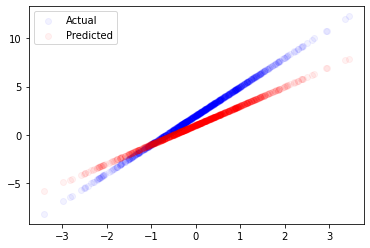

Current loss: 1.961858


In [27]:
plot_data(xs, ys, mod(xs))
print(f'Current loss: {mse(mod(xs), ys).numpy():1.6f}')

In [28]:
def train(mod, inputs, outputs, eta=0.1):
    with tf.GradientTape() as tape:
        current_loss = mse(mod(inputs), outputs)
    dW, db = tape.gradient(current_loss, [mod.W, mod.b])
    mod.W.assign_sub(eta * dW)
    mod.b.assign_sub(eta * db)
    return current_loss

In [29]:
EPOCHS = 15
ETA = 0.1

list_W, list_b = [], []
losses = []
for epoch in range(EPOCHS):
    list_W.append(mod.W.numpy())
    list_b.append(mod.b.numpy())
    loss = train(mod, xs, ys, eta=ETA)
    losses.append(loss)
    print(f'Epoch {epoch:2d}: W: {list_W[-1]:.5f}; b: {list_b[-1]:.5f};'
          f' {loss:.6f}')

Epoch  0: W: 2.00000; b: 1.00000; 1.961858
Epoch  1: W: 2.18916; b: 1.20321; 1.266890
Epoch  2: W: 2.34249; b: 1.36517; 0.818351
Epoch  3: W: 2.46679; b: 1.49425; 0.528777
Epoch  4: W: 2.56757; b: 1.59711; 0.341773
Epoch  5: W: 2.64927; b: 1.67908; 0.220973
Epoch  6: W: 2.71552; b: 1.74439; 0.142915
Epoch  7: W: 2.76924; b: 1.79643; 0.092461
Epoch  8: W: 2.81280; b: 1.83788; 0.059838
Epoch  9: W: 2.84813; b: 1.87091; 0.038738
Epoch 10: W: 2.87679; b: 1.89721; 0.025087
Epoch 11: W: 2.90003; b: 1.91817; 0.016252
Epoch 12: W: 2.91888; b: 1.93485; 0.010532
Epoch 13: W: 2.93417; b: 1.94814; 0.006827
Epoch 14: W: 2.94658; b: 1.95873; 0.004427


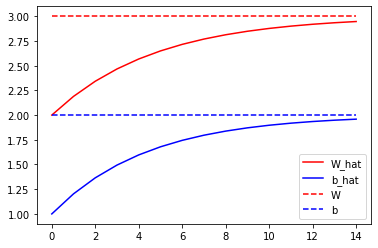

In [31]:
plt.plot(range(EPOCHS), list_W, 'r', range(EPOCHS), list_b, 'b')
plt.plot([TRUE_W] * EPOCHS, 'r--', [TRUE_B] * EPOCHS, 'b--')
plt.legend(['W_hat', 'b_hat', 'W', 'b']);

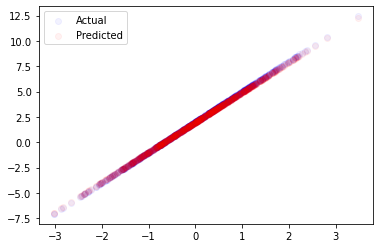

In [34]:
test_inputs = tf.random.normal(shape=[N])
test_outputs = test_inputs*TRUE_W + TRUE_B
preds = mod(test_inputs)
plot_data(test_inputs, test_outputs, preds)

In [35]:
def plot_loss_for_weights(weights, losses):
    for i, w in enumerate(weights):
        plt.subplot(120 + i + 1)
        plt.plot(w['values'], losses, 'r')
        plt.plot(w['values'], losses, 'bo')
        plt.xlabel(w['name'])
        plt.ylabel('MSE')

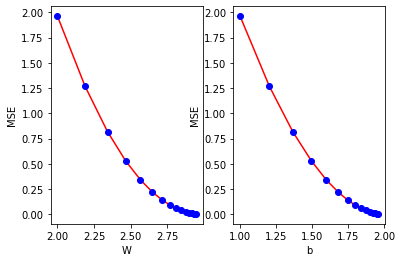

In [36]:
weight_list = [{'name': 'W', 'values': list_W},
               {'name': 'b', 'values': list_b}]
plot_loss_for_weights(weight_list, losses)